In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np

from losscape.train import train
from losscape.create_landscape import create_1D_losscape, create_2D_losscape

In [4]:
class SpiralDataset(Dataset):
    def __init__(self, N, K):
        self.X, self.y = self.generate_spiral_dataset(N, K)
        
        # Convert numpy arrays to PyTorch tensors
        self.X = torch.from_numpy(self.X).float()
        self.y = torch.from_numpy(self.y).long()

    def generate_spiral_dataset(self, N, K):
        X = np.zeros((N*K, 2)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels

        for j in range(K):
            ix = range(N*j, N*(j+1))
            r = np.linspace(0.0, 1, N) # rayon
            t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            y[ix] = j

        return X, y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

N = 100 # number of points per class
K = 3 # number of classes

spiral_dataset_train = SpiralDataset(N, K)
spiral_dataset_test = SpiralDataset(N, K)

train_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=True)
test_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)
train_loader_fixed = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 30)
        self.fc3 = nn.Linear(30, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

In [6]:
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [7]:
train(model, train_loader, epochs=1000, optimizer=optimizer)

Epoch 250/1000. Loss=0.05105264484882355
Epoch 500/1000. Loss=0.035023752599954605
Epoch 750/1000. Loss=0.030976196750998497
Epoch 1000/1000. Loss=0.029321003705263138


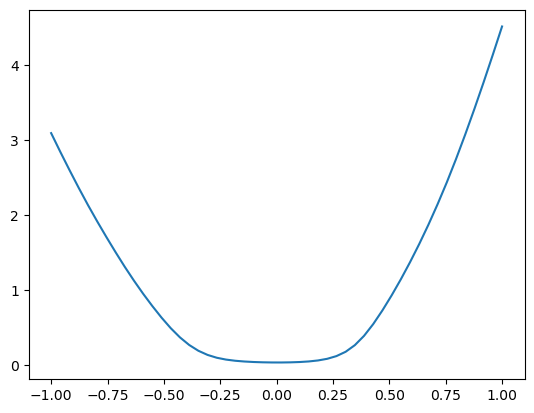

<Figure size 640x480 with 0 Axes>

In [9]:
create_1D_losscape(model, train_loader_fixed)

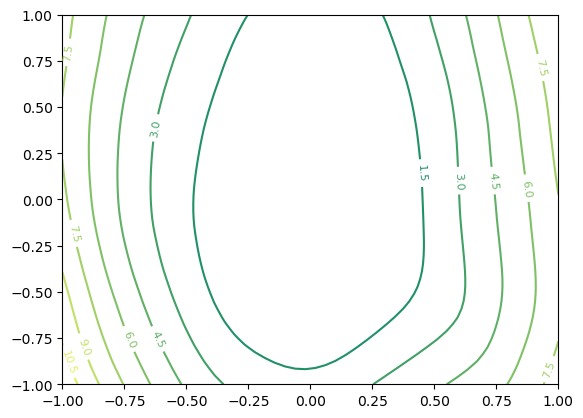

<Figure size 640x480 with 0 Axes>

In [11]:
create_2D_losscape(model, train_loader_fixed)